<a href="https://colab.research.google.com/github/reeruryu/VISIONEERS_study/blob/main/w04.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

컨볼루션 신경망

# **6.3 Fahion MNIST 데이터세트에 적용하기**

In [ ]:
# Fashion MNIST 데이터세트 불러오기 및 정규화
import tensorflow as tf

fashion_mnist = tf.keras.datasets.fashion_mnist
(train_X, train_Y), (test_X, test_Y) = fashion_mnist.load_data()

train_X = train_X / 255.0
test_X = test_X / 255.0

이미지는 채널을 가지고 있고,

Conv2D 레이어는 채널을 가진 형태의 데이터를 받도록

설정돼 있기 때문에 채널을 갖도록 Shape을 바꿉니다

🌼 컬러 이미지는 rgb 3채널

🌼 흑백 이미지는 1채널


In [ ]:
# reshape 이전
print(train_X.shape, test_X.shape)

train_X = train_X.reshape(-1, 28, 28, 1)
test_X = test_X.reshape(-1, 28, 28, 1)

# reshape 이후
print(train_X.shape, test_X.shape)

(60000, 28, 28) (10000, 28, 28)
(60000, 28, 28, 1) (10000, 28, 28, 1)


[9 0 0 3 0 2 7 2 5 5 0 9 5 5 7 9]


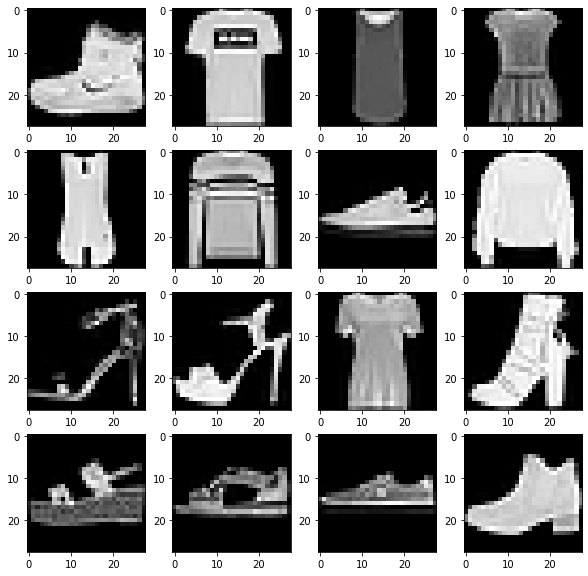

In [ ]:
# 데이터 확인
import matplotlib.pyplot as plt
# 전체 그래프의 크기를 width=10, height=10으로 지정합니다
plt.figure(figsize=(10, 10))
for c in range(16):
  # 4행 4열로 지정한 그리드에서 c+1번째의 칸에 그래프를 그립니다. 1~16번째 칸을 채우게 됩니다
  plt.subplot(4,4,c+1)
  plt.imshow(train_X[c].reshape(28,28), cmap='gray')

# 훈련 데이터의 첫 번째 ~ 16번째까지의 라벨을 프린트합니다
print(train_Y[:16])

In [ ]:
# Fashion MNIST 분류를 위한 컨볼루션 신경망 모델 정의
import tensorflow as tf

model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(input_shape=(28,28,1), kernel_size=(3,3), filters=16),                    
    tf.keras.layers.Conv2D(kernel_size=(3,3), filters=32),
    tf.keras.layers.Conv2D(kernel_size=(3,3), filters=64),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(units=128, activation='relu'),
    tf.keras.layers.Dense(units=10, activation='softmax')
])

model.compile(optimizer=tf.keras.optimizers.Adam(),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 16)        160       
                                                                 
 conv2d_1 (Conv2D)           (None, 24, 24, 32)        4640      
                                                                 
 conv2d_2 (Conv2D)           (None, 22, 22, 64)        18496     
                                                                 
 flatten (Flatten)           (None, 30976)             0         
                                                                 
 dense (Dense)               (None, 128)               3965056   
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                                 
Total params: 3,989,642
Trainable params: 3,989,642
Non-

In [ ]:
# 구글 코랩의 GPU 사양 확인
!nvidia-smi

Sun Jun 26 09:06:10 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.32.03    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   57C    P8    10W /  70W |      0MiB / 15109MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

Epoch 1/25
1407/1407 [==============================] - 19s 6ms/step - loss: 0.4598 - accuracy: 0.8352 - val_loss: 0.3709 - val_accuracy: 0.8663
Epoch 2/25
1407/1407 [==============================] - 8s 5ms/step - loss: 0.3342 - accuracy: 0.8782 - val_loss: 0.3957 - val_accuracy: 0.8657
Epoch 3/25
1407/1407 [==============================] - 7s 5ms/step - loss: 0.2819 - accuracy: 0.8953 - val_loss: 0.3706 - val_accuracy: 0.8697
Epoch 4/25
1407/1407 [==============================] - 8s 5ms/step - loss: 0.2397 - accuracy: 0.9110 - val_loss: 0.4000 - val_accuracy: 0.8621
Epoch 5/25
1407/1407 [==============================] - 8s 6ms/step - loss: 0.2067 - accuracy: 0.9229 - val_loss: 0.4389 - val_accuracy: 0.8715
Epoch 6/25
1407/1407 [==============================] - 8s 5ms/step - loss: 0.1787 - accuracy: 0.9328 - val_loss: 0.4694 - val_accuracy: 0.8661
Epoch 7/25
1407/1407 [==============================] - 7s 5ms/step - loss: 0.1591 - accuracy: 0.9409 - val_loss: 0.5191 - val_accuracy

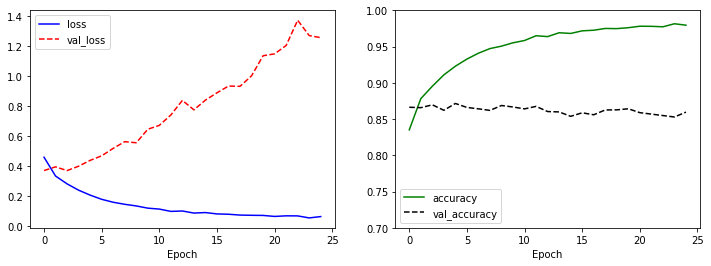

[1.3244150876998901, 0.8537999987602234]

In [ ]:
# Fashion MNIST 분류를 위한 컨볼루션 신경망 모델 학습
history = model.fit(train_X, train_Y, epochs=25, validation_split=0.25)

import matplotlib.pyplot as plt
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], 'b-', label='loss')
plt.plot(history.history['val_loss'], 'r--', label='val_loss')
plt.xlabel('Epoch')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], 'g-', label='accuracy')
plt.plot(history.history['val_accuracy'], 'k--', label='val_accuracy')
plt.xlabel('Epoch')
plt.ylim(0.7, 1)
plt.legend()

plt.show()

model.evaluate(test_X, test_Y, verbose=0)

풀링 레이어와 드롭아웃 레이어는 과적합을 줄이는 데 기여하게 된다

In [ ]:
# Fashion MNIST 분류를 위한 컨볼루션 신경망 모델 정의 - 풀링 레이어, 드롭아웃 레이어 추가
import tensorflow as tf

model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(input_shape=(28,28,1), kernel_size=(3,3), filters=32),     
    tf.keras.layers.MaxPool2D(strides=(2,2)),               
    tf.keras.layers.Conv2D(kernel_size=(3,3), filters=64),
    tf.keras.layers.MaxPool2D(strides=(2,2)),
    tf.keras.layers.Conv2D(kernel_size=(3,3), filters=128),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(units=128, activation='relu'),
    tf.keras.layers.Dropout(rate=0.3),
    tf.keras.layers.Dense(units=10, activation='softmax')
])

model.compile(optimizer=tf.keras.optimizers.Adam(),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 13, 13, 32)       0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 conv2d_8 (Conv2D)           (None, 3, 3, 128)         73856     
                                                                 
 flatten_2 (Flatten)         (None, 1152)             

Epoch 1/25
1407/1407 [==============================] - 7s 4ms/step - loss: 0.5291 - accuracy: 0.8083 - val_loss: 0.3699 - val_accuracy: 0.8655
Epoch 2/25
1407/1407 [==============================] - 6s 4ms/step - loss: 0.3626 - accuracy: 0.8690 - val_loss: 0.3712 - val_accuracy: 0.8605
Epoch 3/25
1407/1407 [==============================] - 7s 5ms/step - loss: 0.3210 - accuracy: 0.8849 - val_loss: 0.3013 - val_accuracy: 0.8906
Epoch 4/25
1407/1407 [==============================] - 7s 5ms/step - loss: 0.2936 - accuracy: 0.8926 - val_loss: 0.3107 - val_accuracy: 0.8841
Epoch 5/25
1407/1407 [==============================] - 6s 4ms/step - loss: 0.2702 - accuracy: 0.9004 - val_loss: 0.3091 - val_accuracy: 0.8867
Epoch 6/25
1407/1407 [==============================] - 6s 4ms/step - loss: 0.2522 - accuracy: 0.9072 - val_loss: 0.3128 - val_accuracy: 0.8897
Epoch 7/25
1407/1407 [==============================] - 7s 5ms/step - loss: 0.2393 - accuracy: 0.9117 - val_loss: 0.3146 - val_accuracy:

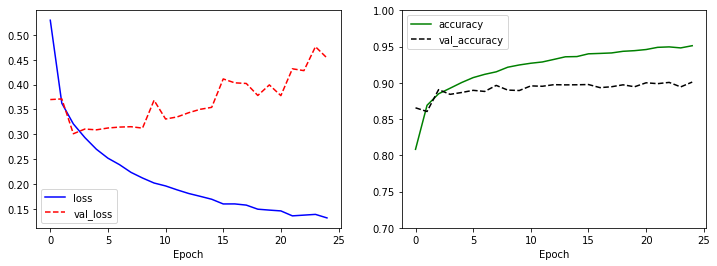

[0.4760209918022156, 0.896399974822998]

In [ ]:
history = model.fit(train_X, train_Y, epochs=25, validation_split=0.25)

import matplotlib.pyplot as plt
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], 'b-', label='loss')
plt.plot(history.history['val_loss'], 'r--', label='val_loss')
plt.xlabel('Epoch')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], 'g-', label='accuracy')
plt.plot(history.history['val_accuracy'], 'k--', label='val_accuracy')
plt.xlabel('Epoch')
plt.ylim(0.7, 1)
plt.legend()

plt.show()

model.evaluate(test_X, test_Y, verbose=0)

# **6.4 퍼포먼스 높이기**

## **6.4.1 더 많은 레이어 쌓기**

In [ ]:
# VGGNet 스타일의 Fashion MNIST 분류를 위한 컨볼루션 신경망 모델 정의

model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(input_shape=(28,28,1), kernel_size=(3,3), filters=32, padding='same', activation='relu'),    
    tf.keras.layers.Conv2D(kernel_size=(3,3), filters=64, padding='same', activation='relu'),
    tf.keras.layers.MaxPool2D(strides=(2,2)),               
    tf.keras.layers.Dropout(rate=0.5),
    tf.keras.layers.Conv2D(kernel_size=(3,3), filters=128, padding='same', activation='relu'),
    tf.keras.layers.Conv2D(kernel_size=(3,3), filters=256, padding='valid', activation='relu'),
    tf.keras.layers.MaxPool2D(strides=(2,2)),
    tf.keras.layers.Dropout(rate=0.5),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(units=512, activation='relu'),
    tf.keras.layers.Dropout(rate=0.5),
    tf.keras.layers.Dense(units=256, activation='relu'),
    tf.keras.layers.Dropout(rate=0.5),
    tf.keras.layers.Dense(units=10, activation='softmax')
])

model.compile(optimizer=tf.keras.optimizers.Adam(),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_9 (Conv2D)           (None, 28, 28, 32)        320       
                                                                 
 conv2d_10 (Conv2D)          (None, 28, 28, 64)        18496     
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 14, 14, 64)       0         
 2D)                                                             
                                                                 
 dropout_2 (Dropout)         (None, 14, 14, 64)        0         
                                                                 
 conv2d_11 (Conv2D)          (None, 14, 14, 128)       73856     
                                                                 
 conv2d_12 (Conv2D)          (None, 12, 12, 256)       295168    
                                                      

Epoch 1/25
1407/1407 [==============================] - 13s 9ms/step - loss: 0.5798 - accuracy: 0.7904 - val_loss: 0.3202 - val_accuracy: 0.8787
Epoch 2/25
1407/1407 [==============================] - 12s 8ms/step - loss: 0.3620 - accuracy: 0.8707 - val_loss: 0.2702 - val_accuracy: 0.8979
Epoch 3/25
1407/1407 [==============================] - 13s 9ms/step - loss: 0.3216 - accuracy: 0.8859 - val_loss: 0.2514 - val_accuracy: 0.9062
Epoch 4/25
1407/1407 [==============================] - 13s 9ms/step - loss: 0.2972 - accuracy: 0.8918 - val_loss: 0.2389 - val_accuracy: 0.9137
Epoch 5/25
1407/1407 [==============================] - 12s 8ms/step - loss: 0.2883 - accuracy: 0.8978 - val_loss: 0.2482 - val_accuracy: 0.9074
Epoch 6/25
1407/1407 [==============================] - 13s 9ms/step - loss: 0.2800 - accuracy: 0.9003 - val_loss: 0.2323 - val_accuracy: 0.9171
Epoch 7/25
1407/1407 [==============================] - 13s 9ms/step - loss: 0.2720 - accuracy: 0.9022 - val_loss: 0.2309 - val_ac

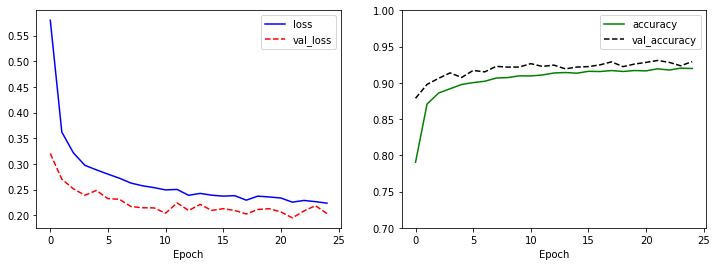

[0.22304196655750275, 0.920799970626831]

In [ ]:
# VGGNet 스타일의 Fashion MNIST 분류를 위한 컨볼루션 신경망 모델 학습
history = model.fit(train_X, train_Y, epochs=25, validation_split=0.25)

import matplotlib.pyplot as plt
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], 'b-', label='loss')
plt.plot(history.history['val_loss'], 'r--', label='val_loss')
plt.xlabel('Epoch')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], 'g-', label='accuracy')
plt.plot(history.history['val_accuracy'], 'k--', label='val_accuracy')
plt.xlabel('Epoch')
plt.ylim(0.7, 1)
plt.legend()

plt.show()

model.evaluate(test_X, test_Y, verbose=0)

## **6.4.2 이미지 보강**

이미지를 가로로 뒤집거나, 약간 회전시키거나, 기울이거나,

일부 확대하거나, 평행이동시켜서 다양한 이미지를 만들어내서

훈련데이터의 표현력을 더 좋게 만드는 이미지 보강 작업을 하자

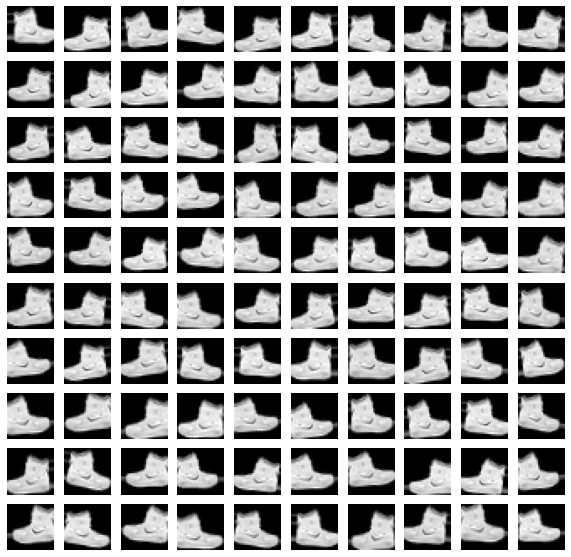

In [ ]:
# Image Agumentation 데이터 표시
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np

image_generator = ImageDataGenerator(
    rotation_range=10,
    zoom_range=0.10,
    shear_range=0.5,
    width_shift_range=0.10,
    height_shift_range=0.10,
    horizontal_flip=True,
    vertical_flip=False)

augment_size=100

x_augmented = image_generator.flow(np.tile(train_X[0].reshape(28*28), 100).reshape(-1,28,28,1),
np.zeros(augment_size), batch_size=augment_size, shuffle=False).next()[0]

# 새롭게 생성된 이미지 표시
import matplotlib.pyplot as plt
plt.figure(figsize=(10,10))
for c in range(100):
  plt.subplot(10,10, c+1)
  plt.axis('off')
  plt.imshow(x_augmented[c].reshape(28,28), cmap='gray')
plt.show()

flow() 함수는 실제로 보강된 이미지를 생성한다

이 함수는 Iterator라는 객체를 만들기 때무네

next() 함수를 사용해서 100장의 값을 순차적으로 꺼냈다


In [ ]:
# 이미지 보강
image_generator = ImageDataGenerator(
    rotation_range=10,
    zoom_range=0.10,
    shear_range=0.5,
    width_shift_range=0.10,
    height_shift_range=0.10,
    horizontal_flip=True,
    vertical_flip=False)

augment_size=30000

randidx = np.random.randint(train_X.shape[0], size=augment_size)
x_augmented=train_X[randidx].copy()
y_augmented=train_Y[randidx].copy()
x_augmented=image_generator.flow(x_augmented, np.zeros(augment_size), batch_size=augment_size, shuffle=False).next()[0]

# 원래 데이터인 x_train에 이미지 보강된 x_augmented 를 추가합니다
train_X = np.concatenate((train_X, x_augmented))
train_Y = np.concatenate((train_Y, y_augmented))

print(train_X.shape)

(90000, 28, 28, 1)


(90000, 28, 28, 1)


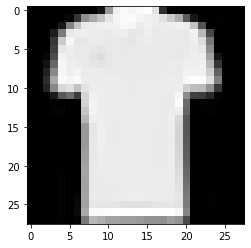

In [ ]:
plt.imshow(x_augmented[4].reshape(28,28), cmap='gray')
print(train_X.shape)

Epoch 1/25
2110/2110 [==============================] - 19s 9ms/step - loss: 0.5740 - accuracy: 0.7893 - val_loss: 0.5824 - val_accuracy: 0.7746
Epoch 2/25
2110/2110 [==============================] - 18s 8ms/step - loss: 0.3897 - accuracy: 0.8573 - val_loss: 0.5086 - val_accuracy: 0.8132
Epoch 3/25
2110/2110 [==============================] - 18s 9ms/step - loss: 0.3535 - accuracy: 0.8708 - val_loss: 0.4646 - val_accuracy: 0.8256
Epoch 4/25
2110/2110 [==============================] - 18s 8ms/step - loss: 0.3304 - accuracy: 0.8808 - val_loss: 0.4436 - val_accuracy: 0.8340
Epoch 5/25
2110/2110 [==============================] - 18s 9ms/step - loss: 0.3103 - accuracy: 0.8874 - val_loss: 0.4235 - val_accuracy: 0.8456
Epoch 6/25
2110/2110 [==============================] - 18s 8ms/step - loss: 0.3043 - accuracy: 0.8899 - val_loss: 0.4280 - val_accuracy: 0.8413
Epoch 7/25
2110/2110 [==============================] - 18s 9ms/step - loss: 0.3006 - accuracy: 0.8925 - val_loss: 0.4273 - val_ac

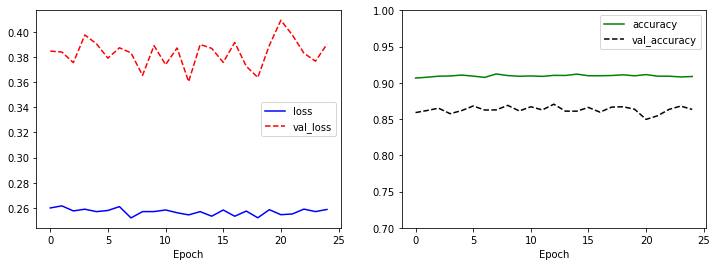

[0.21527859568595886, 0.9236000180244446]

In [ ]:
# VGGNet style 네트워크 + 이미지 보강학습
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(input_shape=(28,28,1), kernel_size=(3,3), filters=32, padding='same', activation='relu'),
    tf.keras.layers.Conv2D(kernel_size=(3,3), filters=64, padding='same', activation='relu'),
    tf.keras.layers.MaxPool2D(pool_size=(2,2)),
    tf.keras.layers.Dropout(rate=0.5),
    tf.keras.layers.Conv2D(kernel_size=(3,3), filters=128, padding='same', activation='relu'),
    tf.keras.layers.Conv2D(kernel_size=(3,3), filters=256, padding='valid', activation='relu'),
    tf.keras.layers.MaxPool2D(pool_size=(2,2)),
    tf.keras.layers.Dropout(rate=0.5),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(units=512, activation='relu'),
    tf.keras.layers.Dropout(rate=0.5),
    tf.keras.layers.Dense(units=256, activation='relu'),
    tf.keras.layers.Dropout(rate=0.5),
    tf.keras.layers.Dense(units=10, activation='softmax')                    
])

model.compile(optimizer=tf.keras.optimizers.Adam(), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

history = model.fit(train_X, train_Y, epochs=25, validation_split=0.25)

import matplotlib.pyplot as plt
# VGGNet 스타일의 Fashion MNIST 분류를 위한 컨볼루션 신경망 모델 학습
history = model.fit(train_X, train_Y, epochs=25, validation_split=0.25)

import matplotlib.pyplot as plt
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], 'b-', label='loss')
plt.plot(history.history['val_loss'], 'r--', label='val_loss')
plt.xlabel('Epoch')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], 'g-', label='accuracy')
plt.plot(history.history['val_accuracy'], 'k--', label='val_accuracy')
plt.xlabel('Epoch')
plt.ylim(0.7, 1)
plt.legend()

plt.show()

model.evaluate(test_X, test_Y, verbose=0)
